In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("India_new_car_sales_by_make.csv")

In [5]:
print ('Missing Values:\n', df.isnull().sum())

Missing Values:
 Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64


In [7]:
df.dropna(inplace = True)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

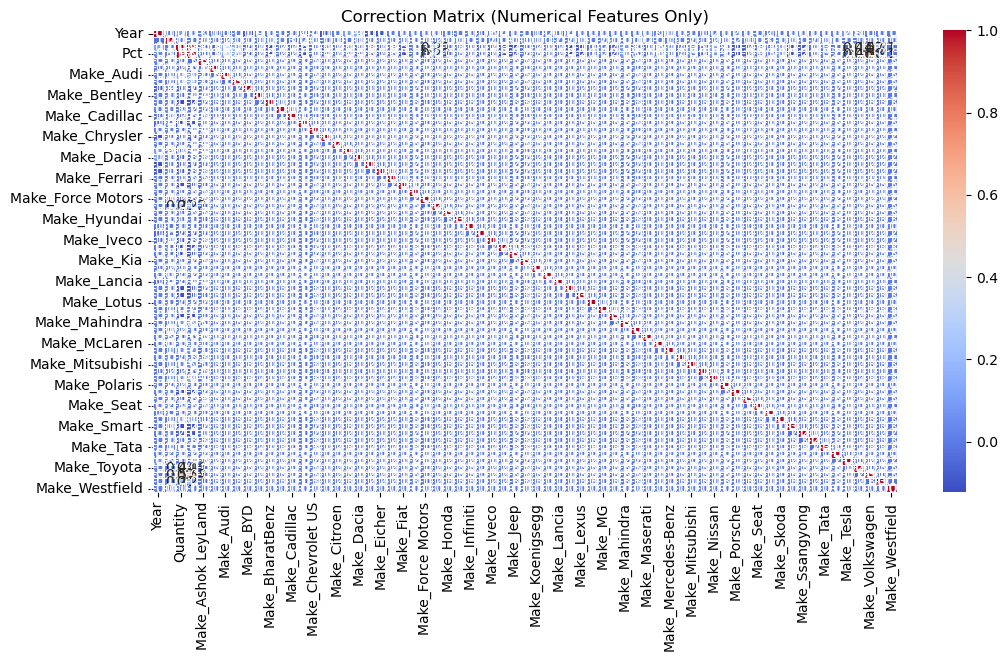

In [13]:
df_encoded = pd.get_dummies(df, columns= ["Make"], drop_first= False)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title('Correction Matrix (Numerical Features Only)')
plt.show()

In [15]:
df

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
X = df_encoded.drop(columns=["Quantity", "Pct"])
y = df_encoded["Quantity"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state = 38)

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([5.600e+01, 3.890e+02, 3.150e+02, 1.551e+03, 4.000e+00, 7.300e+01,
       1.100e+01, 1.480e+02, 2.000e+00, 3.810e+02, 1.100e+01, 1.070e+02,
       1.200e+01, 9.800e+01, 1.000e+00, 2.200e+01, 5.300e+02, 5.790e+02,
       2.500e+01, 3.120e+02, 2.180e+02, 9.000e+00, 7.320e+02, 3.340e+02,
       7.000e+01, 3.400e+01, 2.500e+02, 1.630e+02, 3.890e+02, 5.800e+01,
       2.830e+02, 1.800e+01, 7.000e+00, 1.743e+03, 3.860e+02, 1.000e+00,
       2.920e+02, 2.700e+01, 3.810e+02, 2.100e+01, 3.370e+02, 2.600e+01,
       2.390e+02, 2.600e+01, 2.090e+02, 1.300e+01, 7.520e+02, 1.690e+02,
       2.360e+02, 1.000e+00, 6.000e+00, 2.500e+01, 2.960e+02, 4.890e+02,
       2.500e+02, 4.500e+02, 1.140e+02, 1.800e+01, 6.000e+00, 4.000e+00,
       3.300e+01, 6.600e+01, 2.000e+00, 1.230e+02, 1.200e+01, 1.000e+00,
       3.400e+01, 5.000e+00, 5.170e+02, 1.100e+01, 6.410e+02, 9.210e+02,
       5.430e+02, 6.500e+01, 2.910e+02, 6.000e+00, 1.102e+03, 3.340e+02,
       5.000e+00, 4.500e+01, 1.400e+01, 3.330e+02, 

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
rf_model = DecisionTreeRegressor(random_state=39)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [51]:
print("\n🔹 Decision Tree Regression Performance:")
print(f'MAE: {rf_mae: 2f}')
print(f'MSE: {rf_mse: 2f}')
print(f'R^2 Score: {rf_r2: 2f}')


🔹 Decision Tree Regression Performance:
MAE:  60.078947
MSE:  13410.580092
R^2 Score:  0.919984


In [53]:
future_data = pd.DataFrame({
    "Year": [2026],
    "Month": [1],
    "Make_Toyota": [1],
    "Make_Volkswogen": [0],
    "Make_Mahindra": [0],
    "Make_Tata": [0],
})

In [55]:
future_data = future_data.reindex(columns= X.columns, fill_value=0)
future_data_scaled = scaler.transform(future_data)
future_pred = rf_model.predict(future_data_scaled)
print(f"\n🚗 Predicted Sales for Jan 2026 (Toyota): {future_pred[0]:.0f} units")


🚗 Predicted Sales for Jan 2026 (Toyota): 1526 units


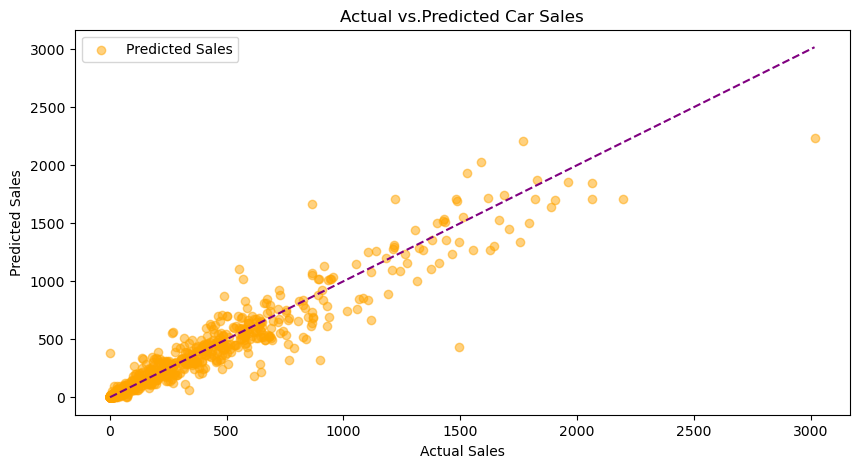

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color="orange", label= "Predicted Sales")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], linestyle="--", color = "purple")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title('Actual vs.Predicted Car Sales')
plt.legend()
plt.show()

In [63]:
future_makes = ['Toyota','Volkswogen','Mahindra','Tata','Volvo']

future_predictions = {}
total_future_sales = 0

for make in future_makes:
    future_data = pd.DataFrame({
        'Year': [2028],
        'Month': [8],
        **{f"Make_{m}": [1 if m == make else 0] for m in future_makes},
    })

In [65]:
future_data = future_data.reindex(columns=X.columns, fill_value=0)

future_data_scaled = scaler.transform(future_data)

future_sales = rf_model.predict(future_data_scaled)[0]
future_predictions[make] = future_sales
total_future_sales += future_sales

print("\n🚗 Predicted Car Sales for August 2028:")
for make, sales in future_predictions.items():
    print(f"{make}: {sales:.0f} units")

print(f"\n📊 Total Predicted Sales (August 2028): {total_future_sales:.0f} units")


🚗 Predicted Car Sales for August 2028:
Volvo: 1158 units

📊 Total Predicted Sales (August 2028): 1158 units


In [67]:
future_pct = {make: (sales /total_future_sales) * 100 for make, sales in future_predictions.items()}

print('\n📈 Predicted Market Share (%) for January 2027:')
for make, pct in future_pct.items():
    print(f"{make}: {pct:2f}%")


📈 Predicted Market Share (%) for January 2027:
Volvo: 100.000000%


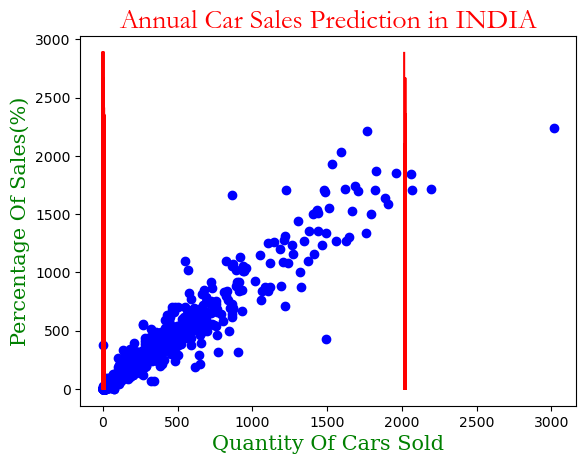

In [69]:
plt.scatter(y_test,y_pred, color= "blue", label="Actual Data")
plt.plot(X, model.predict (X), color='red', label='Regression Line')
font1 =  {'family':'Garamond','color':'red','size':20}
font2 =  {'family':'serif', 'color':'green', 'size':15}
plt.xlabel('Quantity Of Cars Sold', fontdict = font2)
plt.ylabel('Percentage Of Sales(%)', fontdict = font2)
plt.title('Annual Car Sales Prediction in INDIA', fontdict = font1)
plt.show()

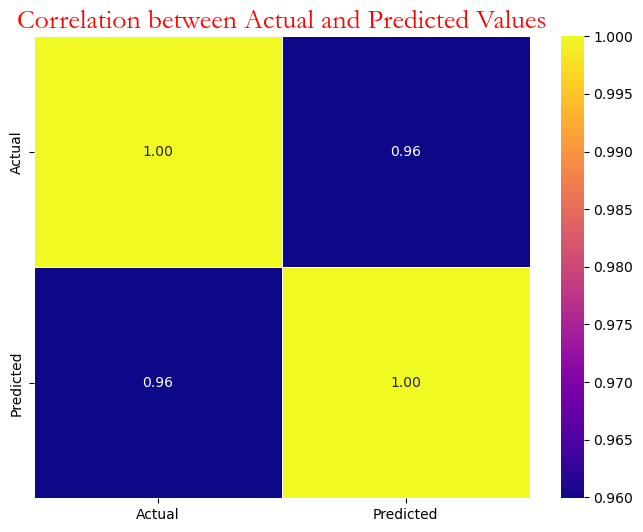

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt='.2f', linewidths = 0.5)
font1 = {'family': 'Garamond', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'green', 'size': 15}
plt.title('Correlation between Actual and Predicted Values', fontdict=font1)
plt.show()

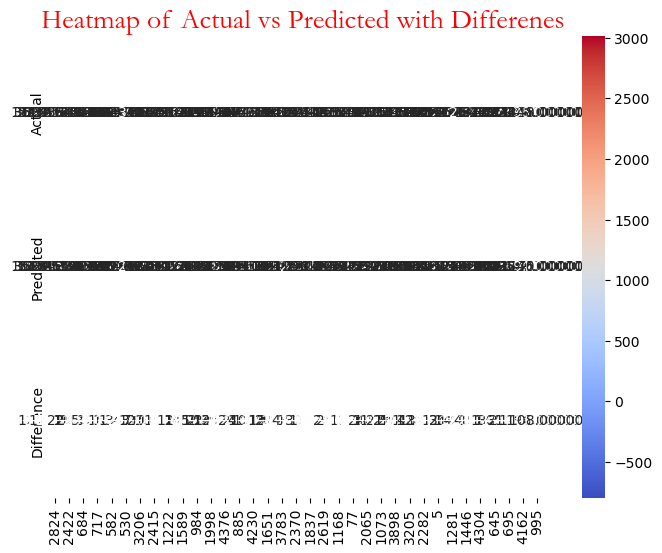

In [79]:
df['Difference'] = df['Actual'] - df['Predicted']
plt.figure(figsize=(8,6))
sns.heatmap(df[['Actual', 'Predicted', 'Difference']].T,annot= True, cmap='coolwarm'
            ,fmt='2f', linewidths=0.5)
plt.title("Heatmap of Actual vs Predicted with Differenes", fontdict=font1)
plt.show()